In [153]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import os

import common

warnings.filterwarnings('ignore')

In [154]:
# ЗАГРУЗКА ПРИЗНАКОВ И МЕТОК

labels = pd.read_csv(common.LabelsPath)
features = pd.read_csv(common.FeaturesPath)

X = np.array(features)
y = np.array(labels).reshape(len(labels))

In [155]:
# РАЗДЕЛЕНИЕ НА ТЕСТОВУЮ И ТРЕНИРОВОЧНУЮ ВЫБОРКИ

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [156]:
# МАСШТАБИРОВАНИЕ ПРИЗНАКОВ

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [157]:
# ПОИСК ЛУЧШИХ ПАРАМЕТРОВ MLP

hidden_layer_sizes = [i for i in range(10, 100, 5)]
train_scores = []
test_scores = []

for i in hidden_layer_sizes:
    mlp = MLPClassifier(random_state=1, hidden_layer_sizes=i, max_iter=300)
    mlp.fit(X_train, y_train)
    train_score = mlp.score(X_train, y_train)
    test_score = mlp.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)

print(test_scores)

[0.6355140186915887, 0.7009345794392523, 0.6915887850467289, 0.7663551401869159, 0.7757009345794392, 0.7663551401869159, 0.7570093457943925, 0.822429906542056, 0.7663551401869159, 0.8130841121495327, 0.7663551401869159, 0.7850467289719626, 0.7663551401869159, 0.8037383177570093, 0.794392523364486, 0.7570093457943925, 0.794392523364486, 0.7663551401869159]


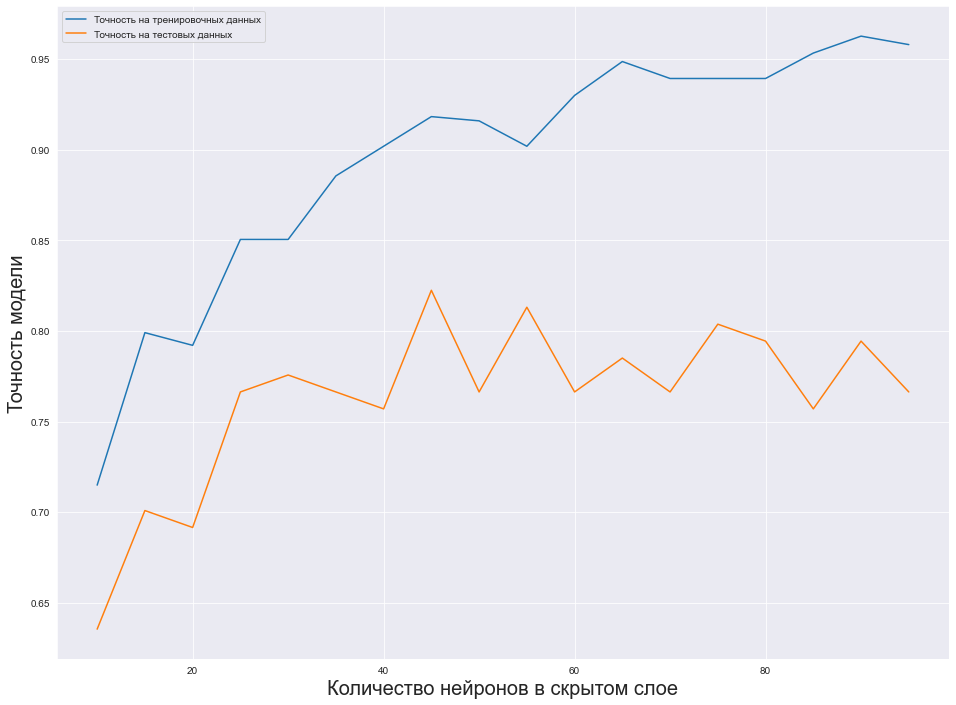

In [158]:
# ТОЧНОСТЬ НА ТРЕНИРОВОЧНЫХ И ТЕСТОВЫХ ДАННЫХ

fig = plt.figure(figsize=(16, 12))

plt.plot(hidden_layer_sizes, train_scores, label="Точность на тренировочных данных")
plt.plot(hidden_layer_sizes, test_scores, label="Точность на тестовых данных")
plt.xlabel("Количество нейронов в скрытом слое", fontsize=20)
plt.ylabel("Точность модели", fontsize=20)
plt.grid(True)
plt.legend()

fig.savefig(os.path.normpath(f"{common.ImagesPath}{os.sep}mlp.png"), bbox_inches="tight", facecolor="white")